[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.2 Szenarien-Residuallast


In [94]:

# OPTIONAL: Load the "autoreload" extension so that code can change
#import config
import matplotlib.pyplot as plt

import FLUCCOplus.scenarios
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
from FLUCCOplus.scenarios import Scenario, Names #Comparison


Es wird hier alle Zukunftsszenarien für ein Jahr in csv-Dateien getrennt nach cutoffs gespeichert.

In [96]:
import FLUCCOplus.transform as traffo

asc = FLUCCOplus.scenarios.all()
ausbauscenarien = list(asc.index[3:])
base_year = 2019 # 2015,2016, 2017, 2018, 2019
cutoffs = [0.4,0.45,0.5,0.55]

exDf_cutoff40 = pd.DataFrame()
exDf_cutoff45 = pd.DataFrame()
exDf_cutoff50 = pd.DataFrame()
exDf_cutoff55 = pd.DataFrame()

basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
PV_ostwest = traffo.Transformation(kind="Photovoltaik", weights=[1.1,1,0.9,0.6,0.6,0.9,1,1.1], timeframe=24)

szenario = "basis"

for s in ausbauscenarien:
    scenario_name = s
    scenario = Scenario(
        name = scenario_name,
        scenario = scenario_name,
        em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
    )

    scenario.reset()
    scenario.apply([basis], reset=True)
    #scenario.define_signal("RES0", separator=0.5)

    signals = pd.DataFrame()

    for i, c in enumerate(cutoffs):
        scenario.define_signal("RES0", separator=c)
        #scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
        signals[f"{c*100} %"] = scenario.signal

    exDf_cutoff40[s] = signals["40.0 %"]
    exDf_cutoff45[s] = signals["45.0 %"]
    exDf_cutoff50[s] = signals["50.0 %"]
    exDf_cutoff55[s] = signals[f"{c*100} %"]

#if not os.path.exists(f"../Data/interim/{szenario}_{base_year}"):
#        os.makedirs(f"../Data/interim/{szenario}_{base_year}")

exDf_cutoff40.to_csv(config.DATA_INTERIM / f"RES0_{szenario}_{base_year}-40.csv", sep=";", decimal=",")
exDf_cutoff45.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-45.csv", sep=";", decimal=",")
exDf_cutoff50.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-50.csv", sep=";", decimal=",")
exDf_cutoff55.to_csv(config.DATA_INTERIM / f"RES0-{szenario}_{base_year}-55.csv", sep=";", decimal=",")

C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages

Ab hier erfolg die detaillierte Analyse momentan nur noch mit einem Ausbauszenario

In [97]:
scenario_name = Names.flucco_2050

base_scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

scenario = Scenario(
    name = scenario_name,
    scenario = scenario_name,
    em_base = {"year": base_year,
               "df": elmap.fetch(year=base_year)}
)

C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\anaconda3\envs\FLUCCOplus\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Text(0.5, 0, '')

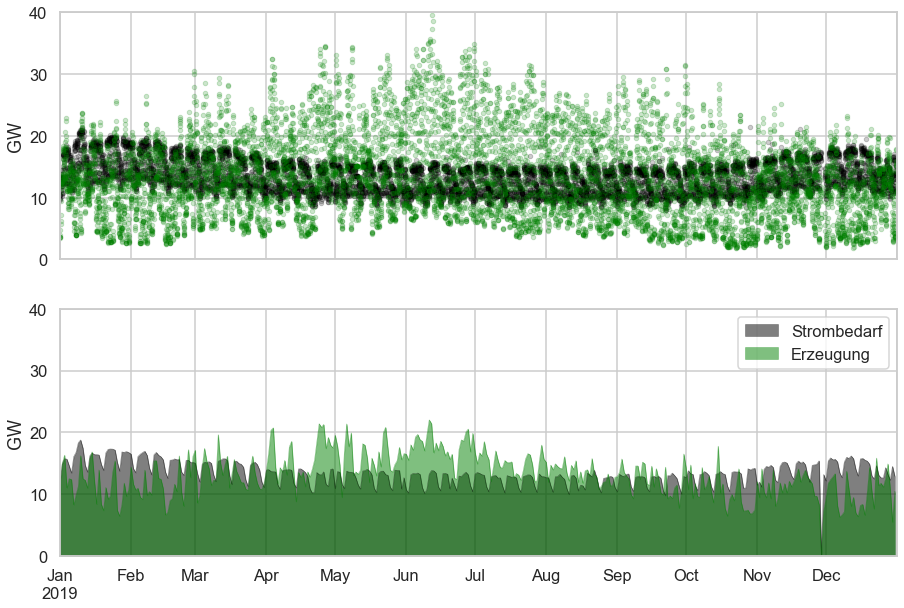

In [98]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)

scenario.plot_supplydemand(ax=ax[0], hourly=True, kind="line")
scenario.plot_supplydemand(ax=ax[1], daily=True, kind="area", legend=True)
[axx.set_ylabel("GW") for axx in ax]
ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)
ax[1].set_xlabel("")

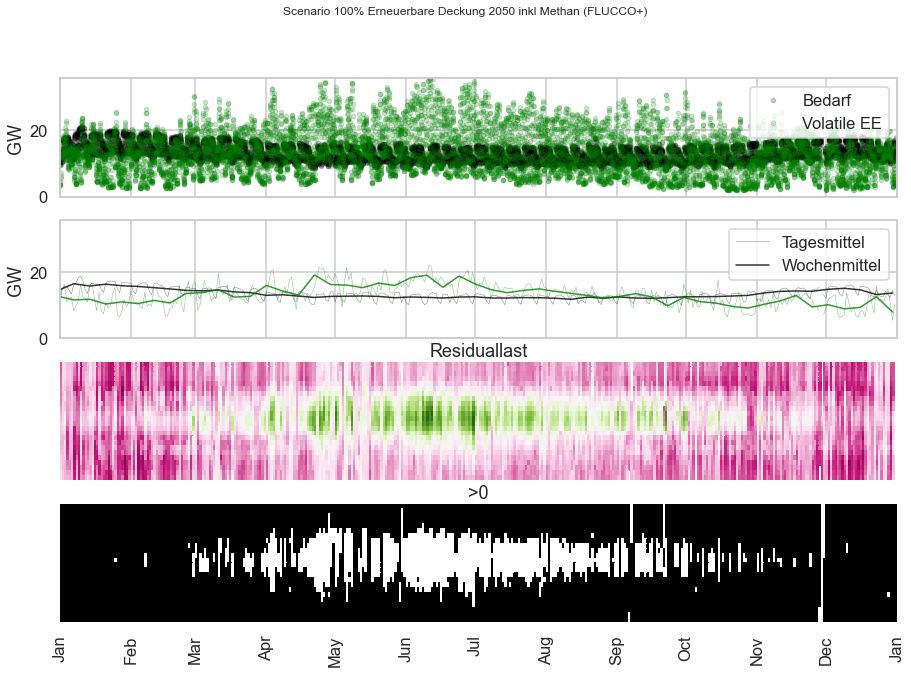

In [99]:
scenario.reset()
fig, ax = scenario.plot()

plt.savefig(config.PLOTS / "Lineares_Szenario.png", dpi=300)

In [100]:
scenario.TSD

,Strombedarf,Pumpspeicher,Laufkraft,Windkraft,Photovoltaik,Volatile EE,Erzeugung,RES0,RES1
datetime,,,,,,,,,
2019-01-01 00:00:00+00:00,10.387538,0.000000,2.835861,0.719090,0.0,3.554951,3.554951,-6.832588,-6.832588
2019-01-01 01:00:00+00:00,10.385867,0.000000,3.016160,0.531668,0.0,3.547828,3.547828,-6.838040,-6.838040
2019-01-01 02:00:00+00:00,9.832339,0.000000,3.018299,0.439869,0.0,3.458168,3.458168,-6.374172,-6.374172
2019-01-01 03:00:00+00:00,9.677684,0.000000,2.990495,0.623466,0.0,3.613962,3.613962,-6.063723,-6.063723
2019-01-01 04:00:00+00:00,9.974759,0.000000,2.933551,1.090110,0.0,4.023661,4.023661,-5.951098,-5.951098
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,13.774574,2.320472,2.984614,6.884903,0.0,9.869517,12.189989,-3.905057,-1.584585
2019-12-31 20:00:00+00:00,12.816790,1.224119,2.711122,7.485420,0.0,10.196542,11.420661,-2.620248,-1.396128
2019-12-31 21:00:00+00:00,12.779105,0.754848,2.598036,7.756991,0.0,10.355027,11.109875,-2.424078,-1.669230


In [101]:
scenario

100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)

Szenario                target          base      scale
Jahr               2050.000000   2019.000000        NaN
Strombedarf      116723.788045  59624.184853   1.957658
Mismatch              0.000000           NaN        NaN
Importe               0.000000           NaN        NaN
Stromproduktion  116723.788045           NaN        NaN
Wasserkraft       49163.070888           NaN        NaN
Pumpspeicher      15732.182684   3538.865922   4.445544
Laufkraft         33430.888204  31262.205147   1.069371
Windkraft         30238.326513   7905.556000   3.824946
Photovoltaik      35376.805146   1326.625000  26.666771
Volatile EE       99046.019863           NaN        NaN
Nicht-Volatile    17677.768183           NaN        NaN
RES0              17677.768183           NaN        NaN
RES1               1945.585499           NaN        NaN
RES2             -15732.182684           NaN        NaN

<AxesSubplot:xlabel='datetime'>

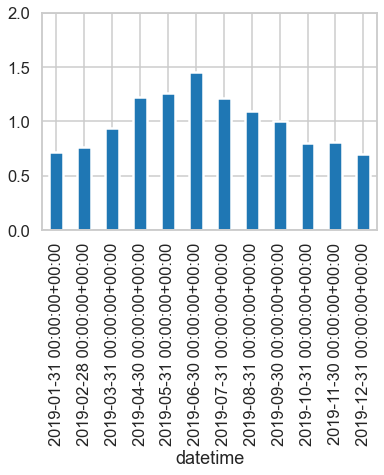

In [102]:
scenario.plot_monthly_mismatch()

<AxesSubplot:>

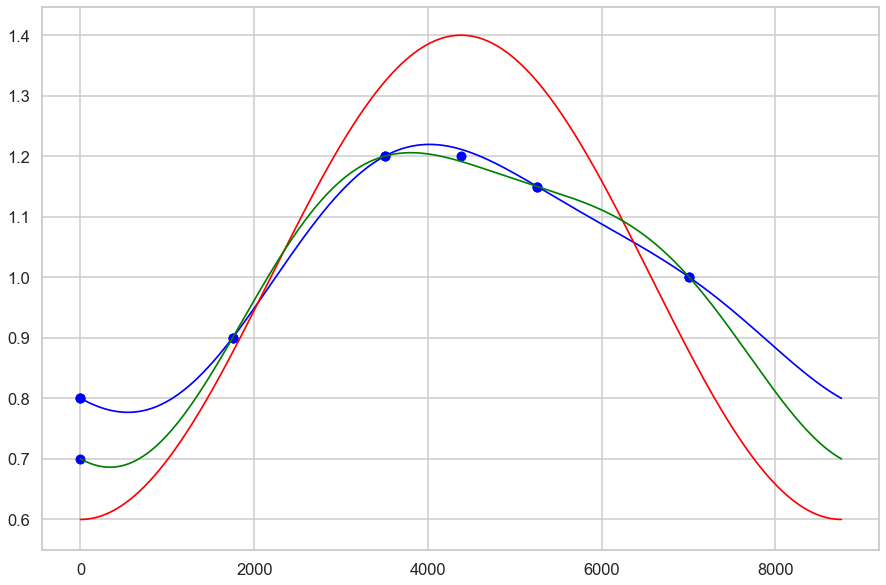

In [103]:
import FLUCCOplus.transform as traffo
basis = traffo.Transformation(kind="Strombedarf", weights=[1,1], timeframe=8760)
saisonale_speicher1 = traffo.Transformation(kind="Strombedarf", weights=[0.8,0.9,1.20,1.15,1], timeframe=8760)
saisonale_speicher2 = traffo.Transformation(kind="Strombedarf", weights=[0.8,1.20], timeframe=8760)
saisonale_speicher3 = traffo.Transformation(kind="Strombedarf", weights=[0.7,0.9,1.20,1.15,1.], timeframe=8760)
fig,ax = plt.subplots(1,1, figsize = (15,10))
saisonale_speicher1.plot(ax=ax, line_color="blue")
saisonale_speicher2.plot(ax=ax, line_color="red")
saisonale_speicher3.plot(ax=ax, line_color="green")

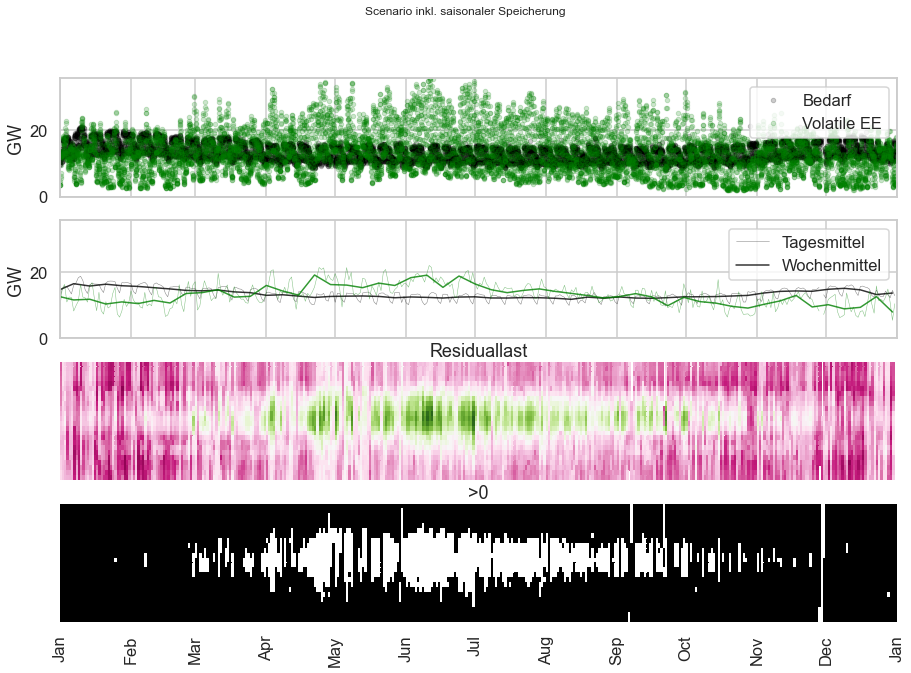

In [104]:
scenario.reset()
scenario.apply([basis], reset=True)
fig, ax = scenario.plot()
fig.suptitle("Scenario inkl. saisonaler Speicherung");
plt.savefig(config.PLOTS / "Speicherszenario.png", dpi=300)

In [105]:
scenario.define_signal("RES0", separator=0.5)


(<Figure size 1080x360 with 3 Axes>,
 array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
        <AxesSubplot:xlabel='datetime'>], dtype=object))

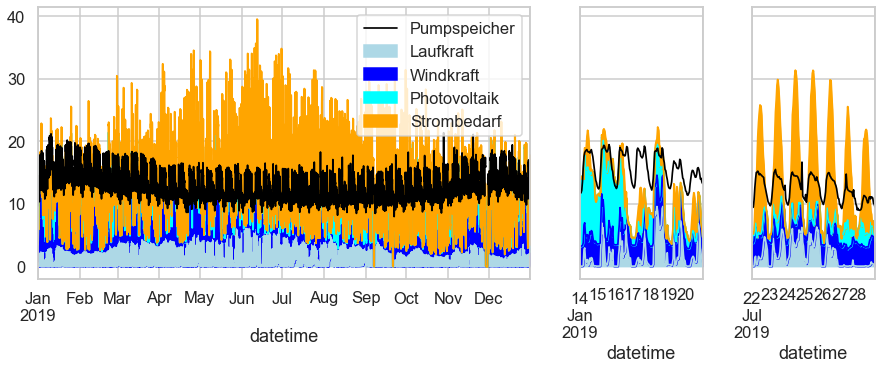

In [106]:

scenario.plot_energy_mix()


In [107]:
scenario.signal

datetime
2019-01-01 00:00:00+00:00    0.0
2019-01-01 01:00:00+00:00    0.0
2019-01-01 02:00:00+00:00    0.0
2019-01-01 03:00:00+00:00    0.0
2019-01-01 04:00:00+00:00    0.0
                            ... 
2019-12-31 19:00:00+00:00    0.0
2019-12-31 20:00:00+00:00    0.0
2019-12-31 21:00:00+00:00    0.0
2019-12-31 22:00:00+00:00    0.0
2019-12-31 23:00:00+00:00    0.0
Freq: H, Name: RES0, Length: 8760, dtype: float64

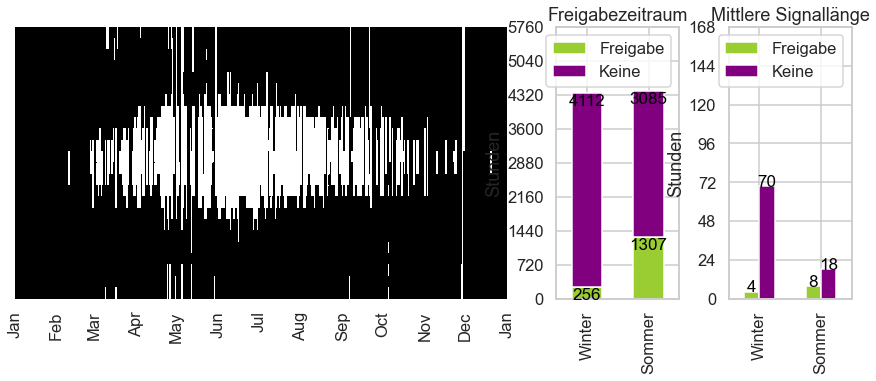

In [108]:
scenario.plot_signal();

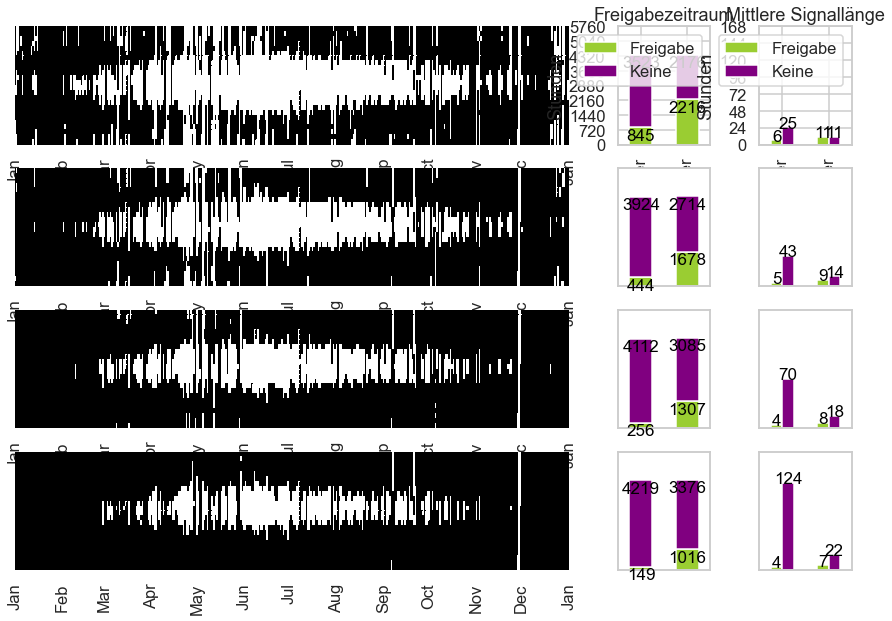

In [109]:
cutoffs = [0.4,0.45,0.5,0.55]

fig, ax = plt.subplots(4,3, figsize=(15,10), gridspec_kw={'width_ratios':[6,1,1]})
signals = pd.DataFrame()

for i, c in enumerate(cutoffs):
    scenario.define_signal("RES0", separator=c)
    scenario.plot_signal(ax=ax[i], legend=(True if i == 0 else False))
    signals[f"{c*100} %"] = scenario.signal

In [110]:
signals

,40.0 %,45.0 %,50.0 %,55.00000000000001 %
datetime,,,,
2019-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0
2019-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2019-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0
2019-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0
2019-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2019-12-31 19:00:00+00:00,0.0,0.0,0.0,0.0
2019-12-31 20:00:00+00:00,0.0,0.0,0.0,0.0
2019-12-31 21:00:00+00:00,0.0,0.0,0.0,0.0


In [111]:
if not os.path.exists("../Data/interim"):
        os.makedirs("../Data/interim")

In [112]:
#Flucco_RES0 = pd.DataFrame()
#Flucco_RES0["100% Erneuerbare Deckung 2050 (FLUCCO+)"] = signals["50.0 %"]
#Flucco_RES0.to_csv(config.DATA_INTERIM / "FLUCCO_RES0_50.csv", sep=";", decimal=",")

In [113]:
signals.to_csv(config.DATA_INTERIM / "RES0-40-55.csv", sep=";", decimal=",")

In [114]:
# c1 = Comparison(base_scenario, scenario)